In [1]:
import xarray as xr
xr.set_options(display_style='html')
import intake
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import cartopy.crs as ccrs
import cartopy
from pathlib import Path

import cftime
import numpy as np
import gcsfs
import skill_metrics as sm

# Load 4 diff models

In [4]:
from pathlib import Path
import intake
import xarray as xr

# import intake_esm
#url = intake_esm.tutorial.get_url('google_cmip6')
#print(url)
url ="https://raw.githubusercontent.com/NCAR/intake-esm-datastore/master/catalogs/pangeo-cmip6.json"

cat = intake.open_esm_datastore(url)

# Find unique entries:
unique = cat.unique()

In [5]:
# unique.source_id

# BCC-CSM2-HR NOPE
# MPI-ESM1-2-LR
# CMCC-CM2-HR4
# ICON-ESM-LR NOPE
# CESM2


## MPI-ESM1-2-LR

In [4]:
cat_subset = cat.search(
    experiment_id=["historical"],
    table_id="Amon",
    variable_id="clt",
    grid_label="gn",
    source_id=["MPI-ESM1-2-LR"],
    # member_id =["r11i1p1f1"]
)

cat_subset.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,MPI-M,MPI-ESM1-2-LR,historical,r1i1p1f1,Amon,clt,gn,gs://cmip6/CMIP6/CMIP/MPI-M/MPI-ESM1-2-LR/hist...,NaN,20190710
1,CMIP,MPI-M,MPI-ESM1-2-LR,historical,r10i1p1f1,Amon,clt,gn,gs://cmip6/CMIP6/CMIP/MPI-M/MPI-ESM1-2-LR/hist...,NaN,20190710
2,CMIP,MPI-M,MPI-ESM1-2-LR,historical,r5i1p1f1,Amon,clt,gn,gs://cmip6/CMIP6/CMIP/MPI-M/MPI-ESM1-2-LR/hist...,NaN,20190710
3,CMIP,MPI-M,MPI-ESM1-2-LR,historical,r4i1p1f1,Amon,clt,gn,gs://cmip6/CMIP6/CMIP/MPI-M/MPI-ESM1-2-LR/hist...,NaN,20190710
4,CMIP,MPI-M,MPI-ESM1-2-LR,historical,r2i1p1f1,Amon,clt,gn,gs://cmip6/CMIP6/CMIP/MPI-M/MPI-ESM1-2-LR/hist...,NaN,20190710
5,CMIP,MPI-M,MPI-ESM1-2-LR,historical,r3i1p1f1,Amon,clt,gn,gs://cmip6/CMIP6/CMIP/MPI-M/MPI-ESM1-2-LR/hist...,NaN,20190710
6,CMIP,MPI-M,MPI-ESM1-2-LR,historical,r6i1p1f1,Amon,clt,gn,gs://cmip6/CMIP6/CMIP/MPI-M/MPI-ESM1-2-LR/hist...,NaN,20190710
7,CMIP,MPI-M,MPI-ESM1-2-LR,historical,r7i1p1f1,Amon,clt,gn,gs://cmip6/CMIP6/CMIP/MPI-M/MPI-ESM1-2-LR/hist...,NaN,20190710
8,CMIP,MPI-M,MPI-ESM1-2-LR,historical,r8i1p1f1,Amon,clt,gn,gs://cmip6/CMIP6/CMIP/MPI-M/MPI-ESM1-2-LR/hist...,NaN,20190710
9,CMIP,MPI-M,MPI-ESM1-2-LR,historical,r9i1p1f1,Amon,clt,gn,gs://cmip6/CMIP6/CMIP/MPI-M/MPI-ESM1-2-LR/hist...,NaN,20190710


In [8]:
home_dir = Path.home()
out_folder = home_dir / "repos/e440/A448/data"
def do_write(dataset,filename,out_folder):
    """
    write a cmip6 data set to the folder ~/repos/e440/tutorials/tutorial_data
    creating the folder if it doesn't already exist.  If the file exits,
    delete it before writing.
    """
    full_path = out_folder / filename
    if full_path.exists():
        full_path.unlink()
    out_folder.mkdir(parents=True,exist_ok=True)
    dataset.load().to_netcdf(full_path,'w')
    return full_path

filename = "MPI_dset_clt_hist.nc"
full_path = out_folder / filename
var_key = "CMIP.MPI-M.MPI-ESM1-2-LR.historical.Amon.gn"

In [6]:
write_file = False
if write_file:
    clt_subset = cat_subset.search(table_id="Amon", variable_id = "clt", source_id = "MPI-ESM1-2-LR", experiment_id = 'historical')
    dset_dict = clt_subset.to_dataset_dict(zarr_kwargs={'consolidated':True})
    MIP_dset = dset_dict[var_key]
    can_bc_dset = MIP_dset.sel(lat = slice(66.33, 90), time = slice('2004', '2015'))
    full_path = do_write(can_bc_dset,filename,out_folder)
    print(f"got here, writing {full_path=}")
#
# read the netcdffile
#
# arctic_ssp_clt = xr.open_dataset(full_path)

In [7]:
MIP_hist_clt = xr.open_dataset(full_path)
MIP_hist_clt

<xarray.Dataset>
Dimensions:         (member_id: 10, dcpp_init_year: 1, time: 132, lat: 12,
                     lon: 192, bnds: 2)
Coordinates:
  * lat             (lat) float64 68.08 69.95 71.81 73.68 ... 84.86 86.72 88.57
    lat_bnds        (lat, bnds) float64 ...
  * lon             (lon) float64 0.0 1.875 3.75 5.625 ... 354.4 356.2 358.1
    lon_bnds        (lon, bnds) float64 ...
  * time            (time) datetime64[ns] 2004-01-16T12:00:00 ... 2014-12-16T...
    time_bnds       (time, bnds) datetime64[ns] ...
  * member_id       (member_id) object 'r10i1p1f1' 'r1i1p1f1' ... 'r9i1p1f1'
  * dcpp_init_year  (dcpp_init_year) float64 nan
Dimensions without coordinates: bnds
Data variables:
    clt             (member_id, dcpp_init_year, time, lat, lon) float32 ...
Attributes: (12/52)
    Conventions:                      CF-1.7 CMIP-6.2
    activity_id:                      CMIP
    branch_method:                    standard
    branch_time_in_child:             0.0
    cmor_version:                     3.5.0
    contact:                          cmip6-mpi-esm@dkrz.de
    ...                               ...
    intake_esm_attrs:table_id:        Amon
    intake_esm_attrs:variable_id:     clt
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:version:         20190710
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           CMIP.MPI-M.MPI-ESM1-2-LR.historical.Amo...

## CMCC-CM

In [8]:
cat_subset = cat.search(
    experiment_id=["historical"],
    table_id="Amon",
    variable_id="clt",
    grid_label="gn",
    source_id=["CMCC-CM2-HR4"],
    # member_id =["r11i1p1f1"]
)

cat_subset.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,CMCC,CMCC-CM2-HR4,historical,r1i1p1f1,Amon,clt,gn,gs://cmip6/CMIP6/CMIP/CMCC/CMCC-CM2-HR4/histor...,NaN,20200904


In [9]:
filename = "CMCC_dset_clt_hist.nc"
full_path = out_folder / filename
var_key = "CMIP.CMCC.CMCC-CM2-HR4.historical.Amon.gn"

In [10]:
write_file = False
if write_file:
    clt_subset = cat_subset.search(table_id="Amon", variable_id = "clt", source_id = "CMCC-CM2-HR4", experiment_id = 'historical')
    dset_dict = clt_subset.to_dataset_dict(zarr_kwargs={'consolidated':True})
    CMCC_dset = dset_dict[var_key]
    can_bc_dset = CMCC_dset.sel(lat = slice(66.33, 90), time = slice('2004', '2015'))
    full_path = do_write(can_bc_dset,filename,out_folder)
    print(f"got here, writing {full_path=}")
#
# read the netcdffile
#
CMCC_hist_clt = xr.open_dataset(full_path)

In [11]:
CMCC_hist_clt

<xarray.Dataset>
Dimensions:         (member_id: 1, dcpp_init_year: 1, time: 132, lat: 26,
                     lon: 288, bnds: 2)
Coordinates:
  * lat             (lat) float64 66.44 67.38 68.32 69.27 ... 88.12 89.06 90.0
    lat_bnds        (lat, bnds) float64 ...
  * lon             (lon) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
    lon_bnds        (lon, bnds) float64 ...
  * time            (time) object 2004-01-16 12:00:00 ... 2014-12-16 12:00:00
    time_bnds       (time, bnds) object ...
  * member_id       (member_id) object 'r1i1p1f1'
  * dcpp_init_year  (dcpp_init_year) float64 nan
Dimensions without coordinates: bnds
Data variables:
    clt             (member_id, dcpp_init_year, time, lat, lon) float32 ...
Attributes: (12/64)
    Conventions:                      CF-1.7 CMIP-6.2
    activity_id:                      CMIP
    branch_method:                    standard
    branch_time_in_child:             0.0
    branch_time_in_parent:            0.0
    cmor_version:                     3.5.0
    ...                               ...
    intake_esm_attrs:variable_id:     clt
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:zstore:          gs://cmip6/CMIP6/CMIP/CMCC/CMCC-CM2-HR4...
    intake_esm_attrs:version:         20200904
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           CMIP.CMCC.CMCC-CM2-HR4.historical.Amon.gn

## CESM2

In [12]:
cat_subset = cat.search(
    experiment_id=["historical"],
    table_id="Amon",
    variable_id="clt",
    grid_label="gn",
    source_id=["CESM2"],
    # member_id =["r11i1p1f1"]
)

cat_subset.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,NCAR,CESM2,historical,r1i1p1f1,Amon,clt,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r1...,NaN,20190308
1,CMIP,NCAR,CESM2,historical,r6i1p1f1,Amon,clt,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r6...,NaN,20190308
2,CMIP,NCAR,CESM2,historical,r5i1p1f1,Amon,clt,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r5...,NaN,20190308
3,CMIP,NCAR,CESM2,historical,r3i1p1f1,Amon,clt,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r3...,NaN,20190308
4,CMIP,NCAR,CESM2,historical,r4i1p1f1,Amon,clt,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r4...,NaN,20190308
5,CMIP,NCAR,CESM2,historical,r2i1p1f1,Amon,clt,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r2...,NaN,20190308
6,CMIP,NCAR,CESM2,historical,r8i1p1f1,Amon,clt,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r8...,NaN,20190311
7,CMIP,NCAR,CESM2,historical,r7i1p1f1,Amon,clt,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r7...,NaN,20190311
8,CMIP,NCAR,CESM2,historical,r9i1p1f1,Amon,clt,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r9...,NaN,20190311
9,CMIP,NCAR,CESM2,historical,r10i1p1f1,Amon,clt,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r1...,NaN,20190313


In [13]:
filename = "CESM2_dset_clt_hist.nc"
full_path = out_folder / filename
var_key = "CMIP.NCAR.CESM2.historical.Amon.gn"

In [14]:
write_file = False
if write_file:
    clt_subset = cat_subset.search(table_id="Amon", variable_id = "clt", source_id = "CESM2", experiment_id = 'historical')
    dset_dict = clt_subset.to_dataset_dict(zarr_kwargs={'consolidated':True})
    MIP_dset = dset_dict[var_key]
    can_bc_dset = MIP_dset.sel(lat = slice(66.33, 90), time = slice('2004', '2015'))
    full_path = do_write(can_bc_dset,filename,out_folder)
    print(f"got here, writing {full_path=}")
#
# read the netcdffile
#
CESM2_hist_clt = xr.open_dataset(full_path)

In [15]:
CESM2_hist_clt

<xarray.Dataset>
Dimensions:         (member_id: 11, dcpp_init_year: 1, time: 132, lat: 26,
                     lon: 288, nbnd: 2)
Coordinates:
  * lat             (lat) float64 66.44 67.38 68.32 69.27 ... 88.12 89.06 90.0
    lat_bnds        (member_id, lat, nbnd) float64 ...
  * lon             (lon) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
    lon_bnds        (lon, nbnd) float64 ...
  * time            (time) object 2004-01-15 12:00:00 ... 2014-12-15 12:00:00
    time_bnds       (time, nbnd) object ...
  * member_id       (member_id) object 'r10i1p1f1' 'r11i1p1f1' ... 'r9i1p1f1'
  * dcpp_init_year  (dcpp_init_year) float64 nan
Dimensions without coordinates: nbnd
Data variables:
    clt             (member_id, dcpp_init_year, time, lat, lon) float32 ...
Attributes: (12/46)
    Conventions:                      CF-1.7 CMIP-6.2
    activity_id:                      CMIP
    branch_method:                    standard
    branch_time_in_child:             674885.0
    contact:                          cesm_cmip6@ucar.edu
    data_specs_version:               01.00.29
    ...                               ...
    intake_esm_attrs:experiment_id:   historical
    intake_esm_attrs:table_id:        Amon
    intake_esm_attrs:variable_id:     clt
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           CMIP.NCAR.CESM2.historical.Amon.gn

## CanESM5

In [16]:
filename = "arctic_dset_clt_grid.nc"
full_path = out_folder / filename
CanESM5_hist_clt = xr.open_dataset(full_path)
CanESM5_hist_clt

<xarray.Dataset>
Dimensions:         (member_id: 65, dcpp_init_year: 1, time: 132, lat: 8,
                     lon: 128, bnds: 2)
Coordinates:
  * lat             (lat) float64 68.37 71.16 73.95 76.74 79.53 82.31 85.1 87.86
    lat_bnds        (lat, bnds) float64 ...
  * lon             (lon) float64 0.0 2.812 5.625 8.438 ... 351.6 354.4 357.2
    lon_bnds        (lon, bnds) float64 ...
  * time            (time) object 2004-01-16 12:00:00 ... 2014-12-16 12:00:00
    time_bnds       (time, bnds) object ...
  * member_id       (member_id) object 'r10i1p1f1' 'r10i1p2f1' ... 'r9i1p2f1'
  * dcpp_init_year  (dcpp_init_year) float64 nan
Dimensions without coordinates: bnds
Data variables:
    clt             (member_id, dcpp_init_year, time, lat, lon) float32 ...
Attributes: (12/47)
    Conventions:                      CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:        1850:01:01:00
    activity_id:                      CMIP
    branch_method:                    Spin-up documentation
    branch_time_in_child:             0.0
    contact:                          ec.cccma.info-info.ccmac.ec@canada.ca
    ...                               ...
    intake_esm_attrs:table_id:        Amon
    intake_esm_attrs:variable_id:     clt
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:version:         20190429
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           CMIP.CCCma.CanESM5.historical.Amon.gn

# Taylor Diagrams - see how the diff models do with cloud fraction prediction

In [6]:
# Model names are:
# 1. MIP_hist_clt
# 2. CMCC_hist_clt
# 3. CESM2_hist_clt
# 4. CanESM5_hist_clt

In [9]:
filename = "MPI_dset_clt_hist.nc"
full_path = out_folder / filename
MPI_dset= xr.open_dataset(full_path)

filename = "CMCC_dset_clt_hist.nc"
full_path = out_folder / filename
CMCC_dset= xr.open_dataset(full_path)

filename = "CESM2_dset_clt_hist.nc"
full_path = out_folder / filename
CESM2_dset= xr.open_dataset(full_path)

filename = "arctic_dset_clt_grid.nc"
full_path = out_folder / filename
CanESM5_dset= xr.open_dataset(full_path)

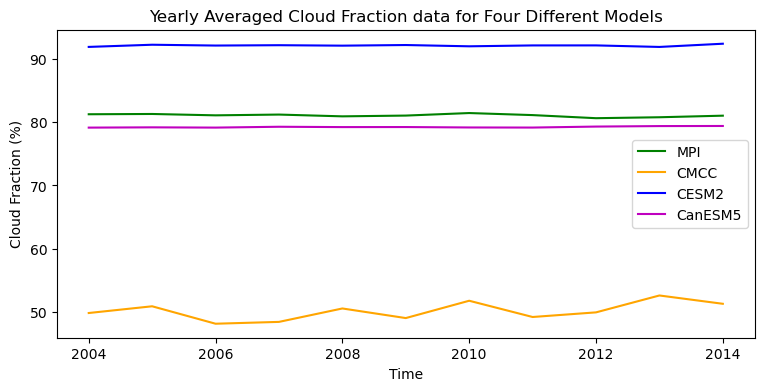

In [30]:
fig, ax1 = plt.subplots(figsize=(9,4))
# ax2 = ax1.twinx()
MPI_mean_yr = MPI_dset.groupby('time.year').mean('time').mean(['lon', 'lat'])
MPI_mean_yr.mean("member_id").clt.plot(label=f"MPI", c="g")

CMCC_mean_yr = CMCC_dset.groupby('time.year').mean('time').mean(['lon', 'lat'])
CMCC_mean_yr.clt.plot(label=f"CMCC", c="orange")

CESM2_mean_yr = CESM2_dset.groupby('time.year').mean('time').mean(['lon', 'lat'])
CESM2_mean_yr.mean("member_id").clt.plot(label=f"CESM2", c="b")

CanESM5_mean_yr = CanESM5_dset.groupby('time.year').mean('time').mean(['lon', 'lat'])
CanESM5_mean_yr.mean("member_id").clt.plot(label=f"CanESM5", c="m")

plt.legend()
plt.title("Yearly Averaged Cloud Fraction data for Four Different Models")
plt.ylabel("Cloud Fraction (%)")
plt.xlabel("Time");

In [31]:
CanESM5 = CanESM5_mean_yr.mean('member_id').clt.to_numpy().flatten()
CMCC = CMCC_mean_yr.mean('member_id').clt.to_numpy().flatten()
CESM2 = CESM2_mean_yr.mean('member_id').clt.to_numpy().flatten()
MPI = MPI_mean_yr.mean('member_id').clt.to_numpy().flatten()
ref = CanESM5

data = {'ref': ref, 'CanESM5': CanESM5, 'CMCC': CMCC, 'CESM2':CESM2, 'MPI':MPI}

CanESM5_stats = sm.taylor_statistics(data['CanESM5'], data['ref'], 'data')
CMCC_stats = sm.taylor_statistics(data['CMCC'], data['ref'], 'data')
CESM2_stats = sm.taylor_statistics(data['CESM2'], data['ref'], 'data')
MPI_stats = sm.taylor_statistics(data['MPI'], data['ref'], 'data')


sdev = np.array([CanESM5_stats['sdev'][0], CanESM5_stats['sdev'][1], 
                 CMCC_stats['sdev'][1], CESM2_stats['sdev'][1],
                 MPI_stats['sdev'][1]])
crmsd = np.array([CanESM5_stats['crmsd'][0], CanESM5_stats['crmsd'][1], 
                 CMCC_stats['crmsd'][1], CESM2_stats['crmsd'][1],
                 MPI_stats['crmsd'][1]])
ccoef = np.array([CanESM5_stats['ccoef'][0], CanESM5_stats['ccoef'][1], 
                 CMCC_stats['ccoef'][1], CESM2_stats['ccoef'][1],
                 MPI_stats['ccoef'][1]])

label = ['Non-Dimensional Observation', 'CanESM5', 'CMCC', 'CESM2', 'MPI']

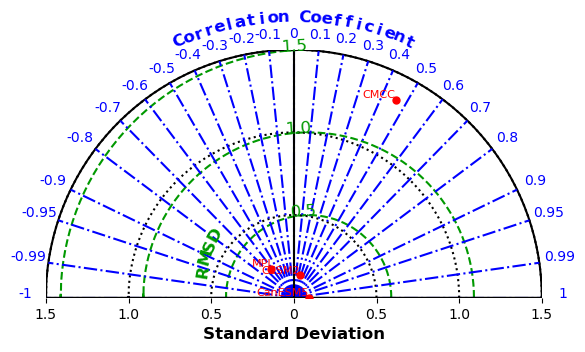

In [34]:
sm.taylor_diagram(sdev,crmsd,ccoef,
                  numberPanels = 2,
                  markerLabel = label, markerLabelColor = 'r')

Shows that MPI and CESM2 are fairly close to CanESM5, but CMCC is very far out and not close. Shows the variation of cloud models!

In [35]:
data = {'ref': ref, 'CanESM5': CanESM5, 'CESM2':CESM2, 'MPI':MPI}

CanESM5_stats = sm.taylor_statistics(data['CanESM5'], data['ref'], 'data')
# CMCC_stats = sm.taylor_statistics(data['CMCC'], data['ref'], 'data')
CESM2_stats = sm.taylor_statistics(data['CESM2'], data['ref'], 'data')
MPI_stats = sm.taylor_statistics(data['MPI'], data['ref'], 'data')


sdev = np.array([CanESM5_stats['sdev'][0], CanESM5_stats['sdev'][1], 
                 CESM2_stats['sdev'][1], MPI_stats['sdev'][1]])
crmsd = np.array([CanESM5_stats['crmsd'][0], CanESM5_stats['crmsd'][1], 
                 CESM2_stats['crmsd'][1],MPI_stats['crmsd'][1]])
ccoef = np.array([CanESM5_stats['ccoef'][0], CanESM5_stats['ccoef'][1], 
                 CESM2_stats['ccoef'][1],MPI_stats['ccoef'][1]])

label = ['Non-Dimensional Observation', 'CanESM5', 'CESM2', 'MPI']

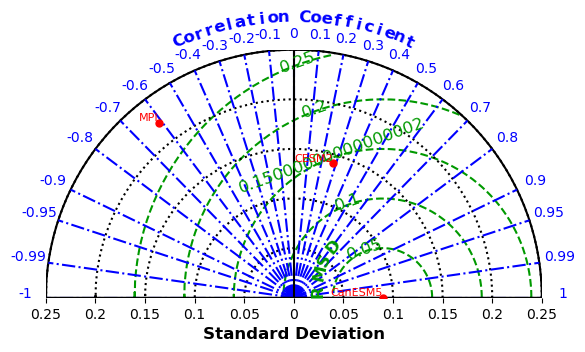

In [36]:
sm.taylor_diagram(sdev,crmsd,ccoef,
                  numberPanels = 2,
                  markerLabel = label, markerLabelColor = 'r')

This shows how spread out MPI and CESM2 are from CanESM5